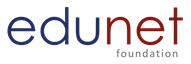

# Edunet Foundation : Class Room Exercises

# Lab 27 House Rent Prediction In India by Scikit-Learn Library

### Objective:
The objective of applying machine learning algorithms using the Scikit-Learn library on a dataset for house rent prediction in India is to create a predictive model that can accurately estimate the rental price of a house based on various features such as location, size, number of bedrooms, amenities, and more. The aim is to provide potential tenants and real estate professionals with a reliable tool to gauge appropriate rental prices, thereby aiding in decision-making processes and ensuring fair market values.

### About Dataset:
Within this dataset, you will find a comprehensive collection of data pertaining to nearly 4700+ available residential properties, encompassing houses, apartments, and flats offered for rent. This dataset is rich with various attributes, including the number of bedrooms (BHK), rental rates, property size, number of floors, area type, locality, city, furnishing status, tenant preferences, bathroom count, and contact information for the respective point of contact.

##### Dataset Glossary (Column-Wise)
- **BHK**: Number of Bedrooms, Hall, Kitchen.
- **Rent**: Rent of the Houses/Apartments/Flats.
- **Size**: Size of the Houses/Apartments/Flats in Square Feet.
- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality**: Locality of the Houses/Apartments/Flats.
- **City**: City where the Houses/Apartments/Flats are Located.
- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.
- **Bathroom**: Number of Bathrooms.
- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

Dataset link: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data

## Importing libraries and reading data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
data.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [4]:
data.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2105,2022-06-12,2,18000,1190,3 out of 4,Carpet Area,Basava Nagar,Bangalore,Semi-Furnished,Bachelors,2,Contact Owner
2861,2022-04-29,2,18000,90,3 out of 4,Super Area,Mahaveer Nagar,Delhi,Unfurnished,Bachelors/Family,2,Contact Owner
877,2022-04-29,1,15000,225,Ground out of 4,Carpet Area,Shrikrupa Society,Mumbai,Unfurnished,Bachelors,1,Contact Owner
4148,2022-06-10,1,10000,500,1 out of 3,Super Area,"Khairatabad, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,1,Contact Owner
1849,2022-05-10,2,13000,1180,1 out of 3,Carpet Area,Electronic City,Bangalore,Semi-Furnished,Family,2,Contact Owner


In [5]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
data.shape

(4746, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [9]:
# general description of dataset
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
data.describe(include='object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [13]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [15]:
# Check for duplicate values and then drop
duplicate_values = data.duplicated().sum()
duplicate_values

0

In [16]:
data = data.drop(['Posted On', 'Floor', 'Area Locality'], axis=1)
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


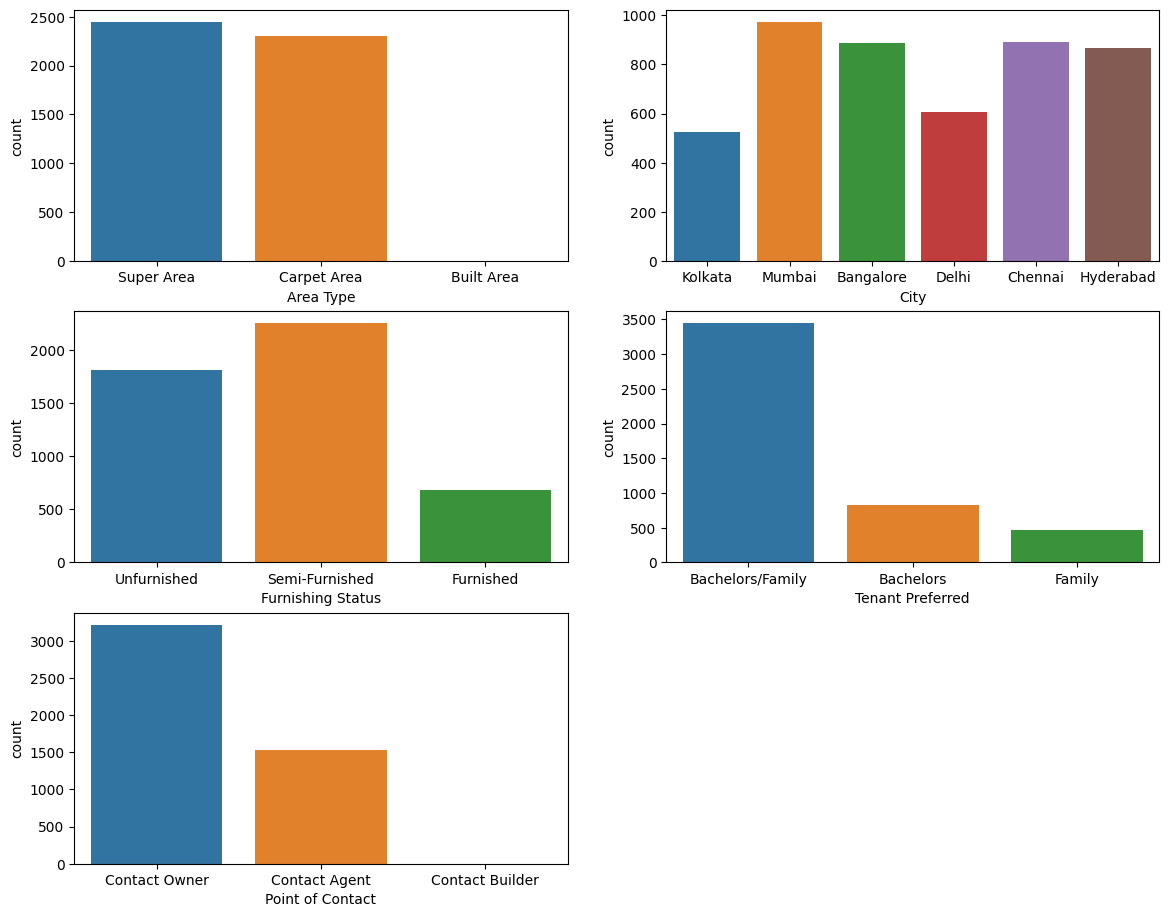

In [17]:
plt.figure(figsize=(14,15))
for i,col in enumerate(["Area Type","City","Furnishing Status","Tenant Preferred","Point of Contact"]):
    plt.subplot(4,2,i+1)
    sns.countplot(data=data,x=col)

Text(0.5, 1.0, 'Relation between rent and BHK by city')

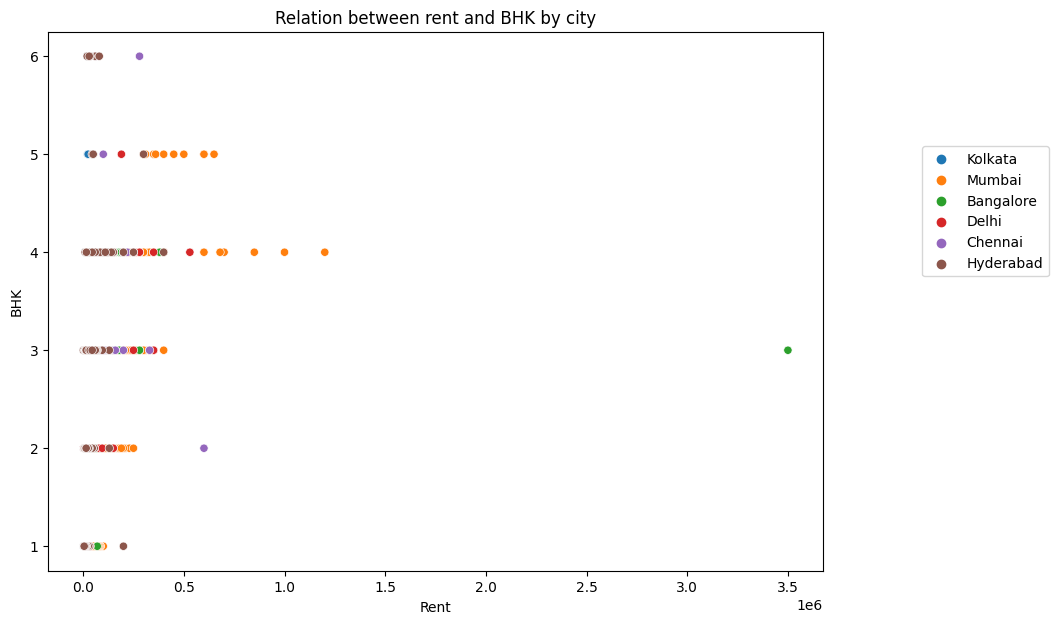

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Rent",y="BHK",data=data,hue="City")
plt.legend(bbox_to_anchor=(1.3,0.8))
plt.title("Relation between rent and BHK by city")

<Axes: xlabel='Rent', ylabel='Size'>

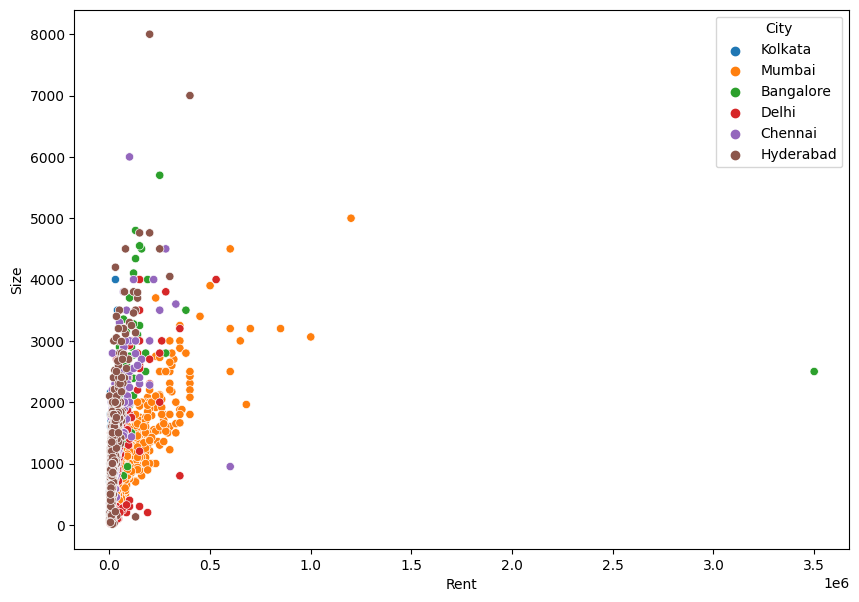

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x="Rent",y="Size",hue="City")

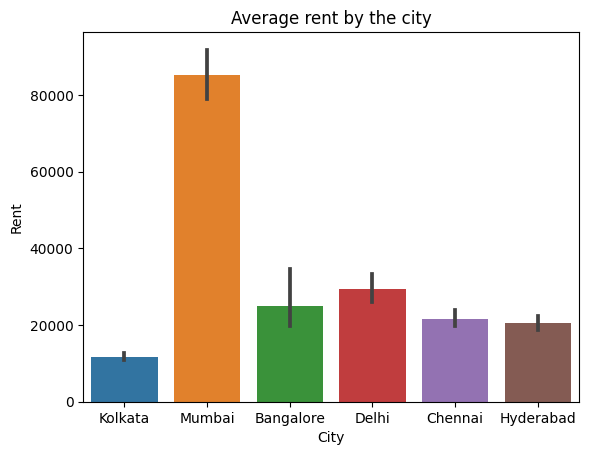

In [20]:
sns.barplot(data=data,x="City",y="Rent")
plt.title("Average rent by the city")
plt.show()

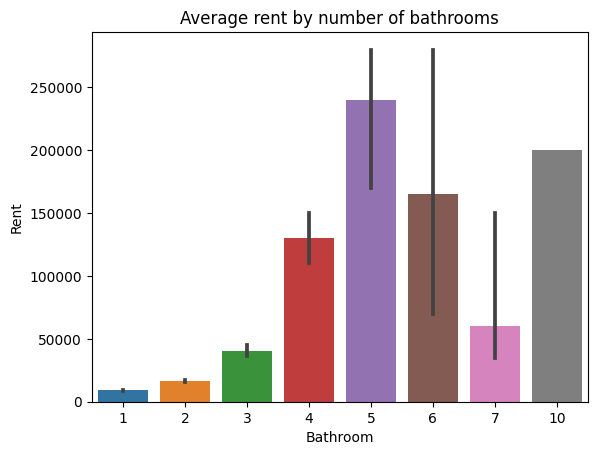

In [21]:
sns.barplot(data=data,x="Bathroom",y="Rent",estimator=np.median)
plt.title("Average rent by number of bathrooms")
plt.show()

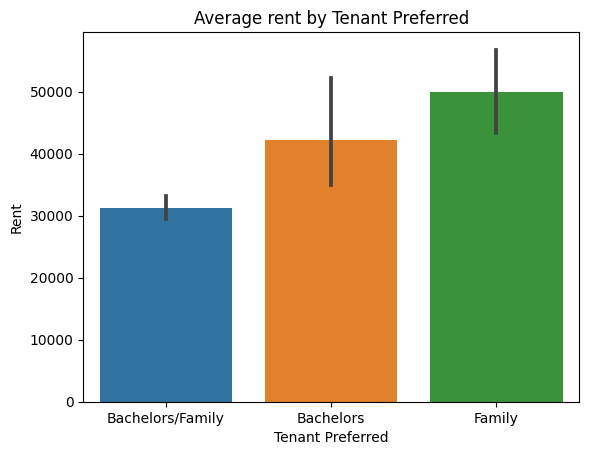

In [22]:
sns.barplot(data=data,x="Tenant Preferred",y="Rent")
plt.title("Average rent by Tenant Preferred")
plt.show()

In [49]:
#!pip install category-encoders

## Data preprocessing and splitting

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
import sklearn.metrics as metrics
import xgboost as xgb
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

In [26]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median absolute error: ',round(median_absolute_error,4))

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
dtypes: int64(4), object(5)
memory usage: 333.8+ KB


In [29]:
categorical_cols = data.select_dtypes(include="object").columns
categorical_cols

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [30]:
for col in categorical_cols:
    print(f"{col}:{data[col].nunique()}")

Area Type:3
City:6
Furnishing Status:3
Tenant Preferred:3
Point of Contact:3


In [31]:
x=data.drop(columns="Rent")
y=data["Rent"]

In [32]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [34]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
x=encoder.fit_transform(x,y)

In [36]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [37]:
 x.columns[:-1]

Index(['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [40]:
x_df = pd.DataFrame(x)
x_df

,0,1,2,3,4,5,6,7
0,0.2,0.136421,0.273162,0.004388,0.009553,0.017960,0.111111,0.003219
1,0.2,0.098874,0.273074,0.004130,0.487075,0.017809,0.000000,0.003165
2,0.2,0.123905,0.273100,0.004207,0.487114,0.017854,0.000000,0.003181
3,0.2,0.098874,0.273162,0.004388,0.009553,0.017960,0.000000,0.003219
4,0.2,0.105131,0.999941,0.004452,0.009593,0.587919,0.000000,0.003233
...,...,...,...,...,...,...,...,...
4741,0.2,0.123905,0.999871,0.124704,0.487140,0.017884,0.111111,0.003192
4742,0.4,0.249061,0.272994,0.124486,0.486957,0.017673,0.222222,0.003116
4743,0.4,0.217772,0.999683,0.124392,0.486879,0.017582,0.222222,0.999656
4744,0.4,0.186483,0.999589,0.124236,0.486748,0.995587,0.111111,0.999541


In [41]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20,random_state=40)

In [42]:
x_train.shape, x_test.shape

((3796, 8), (950, 8))

# Training models and evaluating each model

In [43]:
model_rfr = RandomForestRegressor(n_estimators=7)
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror') 
models = [model_rfr,model_dt,model_lr,model_xgb]

In [44]:
for model in models :
    print(f"fitting model: {model}")
    model.fit(x_train,y_train)

fitting model: RandomForestRegressor(n_estimators=7)
fitting model: DecisionTreeRegressor()
fitting model: LinearRegression()
fitting model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [45]:
for model in models:
    print(f"score of {model} for training data: {model.score(x_train,y_train)}")

score of RandomForestRegressor(n_estimators=7) for training data: 0.9183875478313206
score of DecisionTreeRegressor() for training data: 0.9999999999999806
score of LinearRegression() for training data: 0.29297105483208685
score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) for training data: 0.

In [46]:
for model in models[:]:
    y_predicted = model.predict(x_test)

    print(f"Report:{model}")
    print(f"{regression_results(y_test, y_predicted)}\n")

Report:RandomForestRegressor(n_estimators=7)
explained_variance:  0.9305
r2:  0.9305
MAE:  870.4274
MSE:  229698442.3389
RMSE:  15155.8056
Median absolute error:  0.0
None

Report:DecisionTreeRegressor()
explained_variance:  0.9262
r2:  0.9262
MAE:  1022.8358
MSE:  243920449.7074
RMSE:  15617.9528
Median absolute error:  0.0
None

Report:LinearRegression()
explained_variance:  0.4363
r2:  0.4349
MAE:  22345.7924
MSE:  1866578288.6182
RMSE:  43203.9152
Median absolute error:  16809.2852
None

Report:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_de

* Desicion tree and random forest yielded the best followed closely by XGRegressor while linear regression did very badly

# Happy Learing 😊